# Mass-Casualty Triage Exercise
## Compbio Camp - February 2019
### Author: Eric Friedlander


# <span style='color:blue'>*YOUR NAME HERE*</span>

We are going to be modeling different patient admission policiees over the course of the 12 hours (720 minutes) following a mass-casualty event! By finding the best policy in different scenarios we can more effectively provide treatment and save lives.

## Modeling Patient Arrivals

The function below is commonly used to model the arrival intensity of patients. Notice that we need several packages in order to perform our analysis. There are two parameters: **num_pat** controls the number of patients expected on average and **peak** controls when the number of arrivals with be at its highest intensity. Try playing with the values and examine how it changes the intensity curve (make sure to pay attention to the $y$-axis).

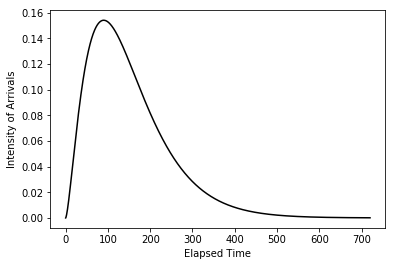

In [51]:
# Import all necessary packages
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

# Define patient arrival rate function
def arr_int(time, num_pats, peak_time):
    # num_pats determines the magnitude of the event (i.e. the number of patients)
    # peak_time controls when the peak arrival time will be
    t = time/60
    out = num_pats / 60 * (t)**(peak_time-1)*np.exp(-t)/(gamma(peak_time))
    return out

# Parameters for the curve
num_pat = 30
peak = 2.5

# Lets plot a sample of the arrival rate function
tp = np.linspace(0, 720, num = 1000)
plt.plot(tp, arr_int(tp, num_pat, peak), color='black')
plt.xlabel('Elapsed Time')
plt.ylabel('Intensity of Arrivals')
plt.show() 

Let's think about what would happen if the arrivals for IMMEDIATE (orange) and DELAYED (blue) patients looked different? Let's specificy a total number of patients **numPatients**, the ratio of IMMEDIATE to DELAYED patients **ratio**, and the peak arrival times of each types of patient **peakI**/**peakD**.

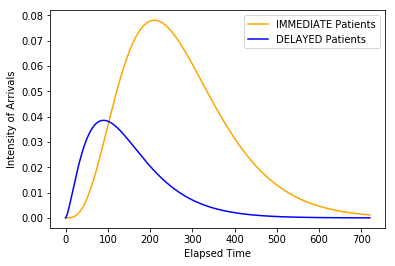

In [2]:
# Parameters for arrival processes
numPatients = 30 # Total number of patients on average
ratio = 1/3 # Ratio of IMMEDIATE patients to DELAYED patients
peakI = 4.5 # This parameter controls when the peak of arrivals is for IMMEDIATE patients
peakD = 2.5 # This parameter controls when the peak of arrivals is for DELAYED patients


# Compute parameters for functions
cI = numPatients / (1+ratio)
cD = numPatients - cI

# Lets plot the arrival rate functions for both classes of patients
tp = np.linspace(0, 720, num = 1000)
plt.plot(tp, arr_int(tp, cI, peakI), label='IMMEDIATE Patients', color='orange') # First plot for red patients
plt.plot(tp, arr_int(tp, cD, peakD), label='DELAYED Patients', color='blue') # First plot for green patients
plt.xlabel('Elapsed Time')
plt.ylabel('Intensity of Arrivals')
plt.legend()
plt.show() 

Let's see how a simulation might work. Run the cell below and follow the direction in the output.

In [43]:
# Parameters for arrival processes
numPatients = 30 # Total number of patients on average
ratio = 1/1 # Ratio of IMMEDIATE patients to DELAYED patients
peakI = 4.5 # This parameter controls when the peak of arrivals is for IMMEDIATE patients
peakD = 2.5 # This parameter controls when the peak of arrivals is for DELAYED patients


# Compute parameters for functions"
cI = numPatients / (1+ratio)
cD = numPatients - cI

# Import poisson process package
from tick.base import TimeFunction
from tick.hawkes import SimuInhomogeneousPoisson

tp = np.linspace(0, 720, num = 1000)
yI = arr_int(tp, cI, peakI)
yD = arr_int(tp, cD, peakD)
tfI = TimeFunction((tp, yI))
tfD = TimeFunction((tp, yD))
red_ind = np.random.binomial(1, ratio/(1+ratio))
ppI = SimuInhomogeneousPoisson([tfI], end_time=720, verbose=False)
ppD = SimuInhomogeneousPoisson([tfD], end_time=720, verbose=False)
ppI.simulate()
ppD.simulate()
if red_ind == 1:
    time = np.random.choice(ppI.timestamps[0])/720 * 120
    col = 'ORANGE'
else:
    time = np.random.choice(ppD.timestamps[0])/720 * 120
    col = 'BLUE'
print('Grab a '+ col + ' index card from the front and write ' + str(np.round(time,1)) + ' on it.')
    

Grab a BLUE index card from the front and write 38.1 on it.


To see a plot of a simulation of all patient arrivals run the next cell. The lines correspond to the arrival intensity, and the x's are the simulated arrivals.

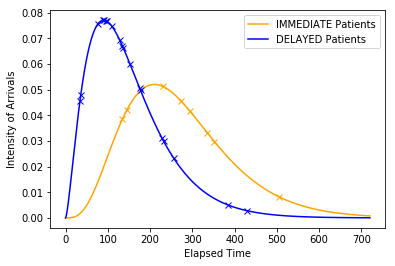

In [44]:
plt.plot(tp, arr_int(tp, cI, peakI), label='IMMEDIATE Patients', color='orange') # First plot for red patients
plt.plot(tp, arr_int(tp, cD, peakD), label='DELAYED Patients', color='blue') # First plot for green patients
plt.plot(ppI.timestamps[0], arr_int(ppI.timestamps[0], cI, peakI), color='orange', marker='x', linestyle='none')
plt.plot(ppD.timestamps[0], arr_int(ppD.timestamps[0], cD, peakD), color='blue', marker='x', linestyle='none')
plt.xlabel('Elapsed Time')
plt.ylabel('Intensity of Arrivals')
plt.legend()
plt.show() 

## Modeling Patient Survival
The function below is commonly used to model patient survival probabilities. There are three parameters: **init** controls the initial probability of survival, **plat** controls how long the initial probability plateaus for (kind of), and **dec** controls how fast a patient deteriorates after the plateau. Run the cell below, trying out different values for these parameters to see how it changes the curve (make sure to pay attention to the $y$-axis.

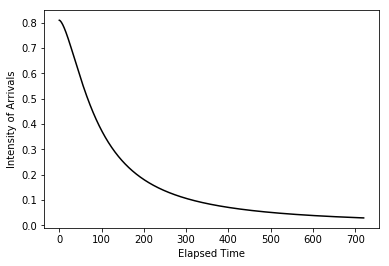

In [50]:
# Define patient survival function
def survival(time, b0, b1, b2):
    t = time
    out = b0 / ((t/b1)**b2 + 1)
    return out

# Parameters of survival probabilities
init = .81 # Initial survival probability
plat = 91 # Legnth of plateau
dec = 1.58 # Rate of decay

# Lets plot a sample of the survival probability function
tp = np.linspace(0, 720, num = 1000)
plt.plot(tp, survival(tp, init, plat, dec), color='black')
plt.xlabel('Elapsed Time')
plt.ylabel('Probability of Survival')
plt.show() 

We would expect the IMMEDIATE and DELAYED class patients to have different survival probabilities, right? Try supplying different parameters for each class below until you have curves which match you intuition. The parameters ending in **I** correspond to the IMMEDIATE patients while those ending in **D** correspond to the DELAYED class patients. Note that the current parameters correspond to those used in the actual paper.

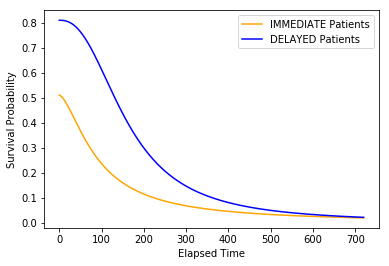

In [52]:
# Parameters of survival probabilities
initI = .51 # Initial survival probability for red
initD = .81 # Initial survival probability for green
platI = 91 # Legnth of plateau for red
platD = 160 # Legnth of plateau for green
decI = 1.58 # Rate of decay for red
decD = 2.41 # Rate of decay for green


tp = np.linspace(0, 720, num = 1000)
plt.plot(tp, survival(tp, initI, platI, decI), label='IMMEDIATE Patients', color='orange') # First plot for red patients
plt.plot(tp, survival(tp, initD, platD, decD), label='DELAYED Patients', color='blue') # First plot for red patients
plt.xlabel('Elapsed Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show() 

Let's expand our simulation a little bit. Run the cell below and follow the direction in the output.

In [70]:
# What color is your index card?
color = 'blue' # Enter 'orange' or 'blue' in LOWERCASE letters
# What was the time written on your index card
time = 0 # Enter the time written on your card



initI = .51 # Initial survival probability for red
initD = .81 # Initial survival probability for green
platI = 91 # Legnth of plateau for red
platD = 160 # Legnth of plateau for green
decI = 1.58 # Rate of decay for red
decD = 2.41 # Rate of decay for green
div_time = 50
if color == 'orange':
    prob = survival(time/120*720 + 50, initI, platI, decI)
elif color == 'blue':
    prob = survival(time/120*720 + 50, initD, platD, decD)
else:
    raise Exception('Error, please enter either orange or blue as your color.')
    

died_ind = np.random.binomial(1, prob)
if died_ind == 1:
    print('Please write SURVIVED on the back of your index card.')
else:
    print('Please write DIED on the back of your index card.')


Please write SURVIVED on the back of your index card.


## Putting It All Together
Now we will take all of these inputs and run an actual simulation of a mass casualty event.

In [94]:
# Parameters for arrival processes
numPatients = 30 # Total number of patients on average
ratio = 1/3 # Ratio of IMMEDIATE patients to DELAYED patients
peakI = 4.5 # This parameter controls when the peak of arrivals is for IMMEDIATE patients
peakD = 2.5 # This parameter controls when the peak of arrivals is for DELAYED patients
divTime = 50 # Number of minutes it takes to get to the next hospital

# Parameters for survival function
initI = .51 # Initial survival probability for red
initD = .81 # Initial survival probability for green
platI = 91 # Legnth of plateau for red
platD = 160 # Legnth of plateau for green
decI = 1.58 # Rate of decay for red
decD = 2.41 # Rate of decay for green


num_reps = 100
num_beds = 10

def simulate(reps, numBeds, divTime):
    tp = np.linspace(0, 720, num = 1000)
    yI = arr_int(tp, cI, peakI)
    yD = arr_int(tp, cD, peakD)
    tfI = TimeFunction((tp, yI))
    tfD = TimeFunction((tp, yD))
    died_FCFS = np.zeros(reps)
    survived_FCFS = np.zeros(reps)
    final_beds_FCFS = np.zeros(reps)
    died_IO = np.zeros(reps)
    survived_IO = np.zeros(reps)
    final_beds_IO = np.zeros(reps)


    for i in range(reps): 
        ppI = SimuInhomogeneousPoisson([tfI], end_time=720, verbose=False)
        ppD = SimuInhomogeneousPoisson([tfD], end_time=720, verbose=False)
        ppI.simulate()
        ppD.simulate()
        timesI = ppI.timestamps[0]
        timesD = ppD.timestamps[0]
        total_patients = len(timesI) + len(timesD)
        bedsRemaining_FCFS = numBeds
        bedsRemaining_IO = numBeds
        while len(timesI) + len(timesD) >0:
            if len(timesI) == 0:
                t = timesD[0]
                timesD = timesD[1:]
                is_I = 0
            elif len(timesD) == 0:
                t = timesI[0]
                timesI = timesI[1:]
                is_I = 1
            else:
                t = np.minimum(timesI[0], timesD[0])
                if t == timesI[0]:
                    timesI = timesI[1:]
                    is_I = 1
                else:
                    timesD = timesD[1:]
                    is_I = 0
           
            # Handle FCFS
            if bedsRemaining_FCFS > 0:
                bedsRemaining_FCFS += -1
                survived_FCFS[i] += 1
            else:
                if is_I == 1:
                    survived_FCFS[i] += np.random.binomial(1, survival(t+divTime, initI, platI, decI))
                else:
                    survived_FCFS[i] += np.random.binomial(1, survival(t+divTime, initD, platD, decD))
                    
           # Handle Immediate only
            if bedsRemaining_IO > 0 and is_I == 1:
                bedsRemaining_IO += -1
                survived_IO[i] += 1
            else:
                if is_I == 1:
                    survived_IO[i] += np.random.binomial(1, survival(t+divTime, initI, platI, decI))
                else:
                    survived_IO[i] += np.random.binomial(1, survival(t+divTime, initD, platD, decD))

        died_FCFS[i] = total_patients - survived_FCFS[i]
        died_IO[i] = total_patients - survived_IO[i]
        final_beds_FCFS[i] = bedsRemaining_FCFS
        final_beds_IO[i] = bedsRemaining_IO
    return [died_FCFS, died_IO, survived_FCFS, survived_IO, final_beds_FCFS, final_beds_IO]
    
output = simulate(num_reps, num_beds, divTime)
if num_reps == 1:
    print('FCFS resulted in '+ str(output[0][0]) + ' deaths and ' + str(output[2][0]) 
           + ' survivers with ' + str(output[4][0]) + ' beds remaining.')
    print('IMMEDIATE ONLY resulted in '+ str(output[1][0]) + ' deaths and ' + str(output[3][0]) 
           + ' survivers with ' + str(output[5][0]) + ' beds remaining.')
elif num_reps > 1:
    print('FCFS resulted in an average of '+ str(np.mean(output[0])) + ' deaths and ' + str(np.mean(output[2])) 
           + ' survivers with ' + str(np.mean(output[4])) + ' beds remaining.')
    print('IMMEDIATE ONLY resulted in an average of '+ str(np.mean(output[1])) + ' deaths and ' + str(np.mean(output[3])) 
           + ' survivers with ' + str(np.mean(output[5])) + ' beds remaining.')
else:
    raise Exception('Please input number of repetitions which is greater than 0.')

FCFS resulted in an average of 17.19 deaths and 12.39 survivers with 0.0 beds remaining.
IMMEDIATE ONLY resulted in an average of 14.24 deaths and 15.34 survivers with 0.2 beds remaining.


It may be helpful to look at the distribution of our simulation results, run the cell below to get some "box-and-whisker" plots of our simulated data.

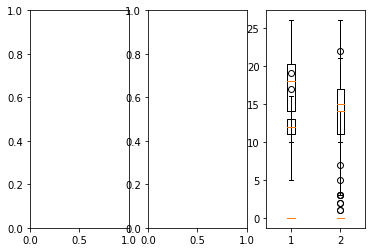

In [104]:
fig, axs = plt.subplots(1, 3)
axs[0] = plt.boxplot(output[0:2])
# axs[0].set_title('Deaths')

axs[1] = plt.boxplot(output[2:4])
# axs[1].set_title('Survivers')

axs[2] = plt.boxplot(output[4:])
# axs[2].set_title('Remaining Beds')



100